### 1. verify (1)

$$
L = \prod_{k:y_k=1}p_k \prod_{k:y_k=0}(1-p_k)=
\begin{cases}
\sum ln(p_k), \quad y=1 \\
\sum ln(1-p_k), \quad y = 0
\end{cases}
$$ 

Thus, 
$$
l = ln(L) = \sum_{k:y_k=1} ln(p_k) + \sum_{k:y_k=0} ln(1-p_k)\\
  = \sum_{k=1}^K (y_k ln(p_k) + (1-y_k)ln(1-p_k)) 
$$

### 2. calculate $∇l$
We know that $p(k)=\frac{1}{1+e^{-(\beta_0 + \beta_1x)}}$, Thus:

$$ l(\beta_0,\beta_1) = \sum-y(1+e^{-(\beta_0 + \beta_1x_k)}) + (1-y)ln(\frac{e^{-(\beta_0 + \beta_1x_k)}}{1 + e^{-(\beta_0 + \beta_1x_k)}})=-ln(1+e^{-(\beta_0+\beta_1x)})+(y-1)(\beta_0+\beta_1x)$$

$$ \frac{\partial p(x)}{\beta_0}= \sum(y-1)-(\frac{-e^{-(\beta_0 + \beta_1x_k)}}{1 + e^{-(\beta_0 + \beta_1x_k)}})=y-\frac{1}{1 + e^{-(\beta_0 + \beta_1x_k)}}=y-p(x_k)$$

$ \frac{\partial p(x)}{\beta_0}=\sum(y-1)x-(\frac{-xe^{-(\beta_0 + \beta_1x_k)}}{1 + e^{-(\beta_0 + \beta_1x_k)}})=(y-\frac{1}{1 + e^{-(\beta_0 + \beta_1x_k)}})x=(y-p(x_k))x_k $

To conclude, 
$$
\frac{\partial l}{\partial \beta}= \left[
\begin{matrix}
\sum_1^ky-p(x_k) \\
\sum_1^k(y-p(x_k))x_k \\
\end{matrix}
\right] $$

### 3. calculate $∇^2l$
$$
\nabla ^2 \ell= 
\left[
\begin{matrix}
\frac{\partial \ell(x)}{\partial^2 \beta_0} & \frac{\partial \ell(x)}{\partial \beta_0 \beta_1} \\
\frac{\partial \ell(x)}{\partial \beta_1 \beta_0} & \frac{\partial \ell(x)}{\partial^2 \beta_1}
\end{matrix} 
\right] $$

$$ =\left[
\begin{matrix}
\sum_1^k(\frac{-e^{-(\beta_0 + \beta_1x_k)}}{{1 + e^{-(\beta_0 + \beta_1x_k)}}^2})x_k & \sum_1^k(\frac{-xe^{-(\beta_0 + \beta_1x_k)}}{{1 + e^{-(\beta_0 + \beta_1x_k)}}^2})x_k\\
\sum_1^k(\frac{-xe^{-(\beta_0 + \beta_1x_k)}}{{1 + e^{-(\beta_0 + \beta_1x_k)}}^2})x_k & \sum_1^k(\frac{-x^2e^{-(\beta_0 + \beta_1x_k)}}{{1 + e^{-(\beta_0 + \beta_1x_k)}}^2})x_k\\
\end{matrix}
\right]=\left[
\begin{matrix}
\sum_1^k-p(x)[1-p(x)] & \sum_1^k-xp(x)[1-p(x)]\\
\sum_1^k-xp(x)[1-p(x)] & \sum_1^k-x^2p(x)[1-p(x)]\\
\end{matrix}
\right]$$

### 4. Write a Newton methods to fit the data

In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LogisticRegression:
    row = 0
    col = 0
    iters = 10
    X = []
    theta = []
    y = []
    cost = []
    theta_lst = [] 
    
    def __init__(self, data):
        self.row, self.col = np.shape(data)
        self.X = data[:, :self.col - 1]
        self.y = data[:, self.col - 1:self.col]

        self.theta = np.matrix(np.zeros((self.col-1, 1)))
#         print(self.__theta)


    def getTheta(self):
        return self.theta
    
    def getThetaLst(self):
        return self.theta_lst
    
    # get cost
    def returnCost(self):
        return self.cost

    # train and update the theta 
    def train(self):
        self.cost = np.matrix(np.zeros((self.iters, 1)))
        for i in range(0, self.iters):
            self.updateTheta(i)

    # update the theat by newton method
    def updateTheta(self, i):
        h = 1.0 / (1 + np.exp(-(self.X * self.theta)))

        self.getCost(i, h)
        # Jacobian
        J = self.X.T * (h - self.y)
        
        # Hessain: X * h(1-h) * X^T
#         H = multiply(1.0 / self.row, self.X.T * diag(multiply(h, (1 - h)).T.getA()[0]) * self.X)
        H = np.dot(self.X.T.getA() * np.multiply(h, (1 - h)).T.getA(), self.X.getA())
#         print(H)
#         print(multiply(h, (1 - h)).T.getA().shape)

        # update direction: - inv(Hx) * Jx
        
        # based on the direction to update 
        self.theta = self.theta - np.matrix(H).I * J
        self.theta_lst.append(self.theta.getA().tolist())
        
    def getCost(self, i, h):
        self.cost[i, :] = sum(-self.y.T * np.log(h) - (1 - self.y).T * np.log((1 - h))) / self.row
        
X = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
y = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]
data = pd.DataFrame([np.ones(len(X)), X, y], index=["x0", "x1", "y"]).T
# print(data)

model = LogisticRegression(np.matrix(data))
model.train()
# print(len(model.getThetaLst()))
print(model.returnCost())

[[0.69314718]
 [0.42801435]
 [0.40339835]
 [0.40151338]
 [0.40149393]
 [0.40149392]
 [0.40149392]
 [0.40149392]
 [0.40149392]
 [0.40149392]]


[[-3.6613418516608376], [1.338579493390057]]
[[-2.6157410759539506], [0.9383824487727177]]
[[-3.6613418516608376], [1.338579493390057]]
[[-4.035261596950062], [1.4873867288816218]]
[[-4.077229053645935], [1.5044460173027259]]
[[-4.077713366075043], [1.504645401369092]]
[[-4.077713431087628], [1.5046454283733321]]
[[-4.077713431087633], [1.5046454283733344]]
[[-4.07771343108763], [1.5046454283733333]]
[[-4.0777134310876315], [1.5046454283733335]]
[[-4.077713431087628], [1.5046454283733326]]


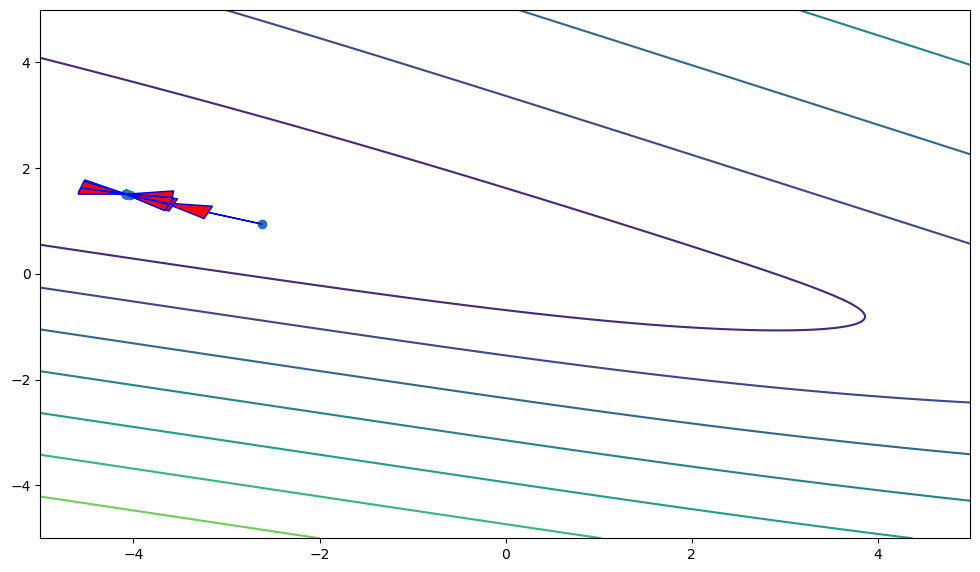

In [400]:
range_y = np.arange(-5, 5, 0.01)
range_x = np.arange(-5, 5, 0.01)
# change to grid
grid_x, grid_y = np.meshgrid(range_x, range_y)

data_x = np.array([np.ones(len(X)), X])
# print(data_x.shape)

# print(data_y), 

def sigmoid(X, theta):
#     print(beta.shape)
    h = 1.0 / (1 + np.exp(-np.dot(theta, data_x)))
    return h

def loss(theta):
    h = 1.0 / (1 + np.exp(-np.dot(theta, data_x)))
    return -np.sum((np.array(y) * np.log(h) + (1 - np.array(y)) * np.log(1 - h)), axis=-1) / len(y)

# Round and round contour lines
# grid_z = loss(np.array([grid_x, grid_y]).T)
grid_z = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        ary = np.array([grid_x[i][j], grid_y[i][j]])
        grid_z[i][j] = loss(ary)
fig, ax = plt.subplots(figsize=(12, 7), dpi=100)
# Loss in the contour views
cs = ax.contour(grid_x, grid_y, grid_z)
theta_lst = model.getThetaLst()
print(theta_lst[1])
theta_0 = []
theta_1 = []

theta = []
for t in theta_lst: 
    print(t)
    theta_0.append(t[0][0])
    theta_1.append(t[1][0])
#     theta.append([t[0][0], t[1][0]])

# Add the arrow at all the loss point
ax.scatter(theta_0, theta_1)
for i in range(len(theta_0)):
    if i+1 < len(theta_0):
        ax.arrow(theta_0[i], theta_1[i],theta_0[i+1]-theta_0[i],theta_1[i+1]-theta_1[i],length_includes_head = True,head_width = 0.25,head_length = 0.5,fc = 'r',ec = 'b')


The final result of Newton method:
beta0:-4.077713431087628, beta1: 1.5046454283733326

In [402]:
theta = model.getTheta()
print(theta.getA())
pred = 1.0 / np.squeeze(1 + np.exp(-np.dot(data_x.T, theta.getA())))
print(pred)
pred[pred>=0.5] = 1
pred[pred<0.5] = 0
np.sum((pred - np.array(y)) == 0)/20

[[-4.07771343]
 [ 1.50464543]]
[0.03471034 0.04977295 0.07089196 0.10002862 0.13934447 0.1908365
 0.1908365  0.25570318 0.33353024 0.42162653 0.51501086 0.60735865
 0.69261733 0.76648084 0.8744475  0.91027764 0.93662366 0.95561071
 0.96909707 0.98519444]


0.8

### 5. Running the program after choosing the initial point, you may encounter singular matrices when doing matrix operations, which means that the method of not knowing the next convergence can't get the error, so we can try different initial points many times, as long as we don't In the above situation, they should always converge towards the minimizer.

### 6. Results with other fitting tool box

In [403]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [404]:
X = np.array([np.ones(20), [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T
model.fit(X, y)

LogisticRegression()

In [405]:
np.sum(model.predict(np.array(X)) - np.array(y) == 0) / 20

0.8

### Write own logistic regression program with gradient descent

In [406]:
theta_ls = [] 

def sigmoid1(z):
#     print(z)
    gz = 1/(1+np.exp(-z))
    return gz

def cost(theta, X, y):
    ''' cost function for you to minimize'''
#     print(theta)
    hx = sigmoid1(np.matmul(np.matrix(X), np.transpose(theta)))
    cost1 = 1/len(hx)*(np.dot(np.matrix(np.transpose(-y)), np.log(hx+np.exp(-8)))[0,0] - np.dot(np.matrix(np.transpose(1-y)), np.log(1-hx+np.exp(-8)))[0,0])
#     print(cost1)
    return cost1

#code here to implement the above gradient function
def gradient(theta, X, y):
    iters = 10
    alpha = 0.01
    theta_lst = theta.tolist()[0]

    for i in range(iters):
        hx = sigmoid1(np.matmul(X, np.transpose(-theta)))
        for i in range(theta.shape[1]):
#             print((np.dot(np.transpose(hx-y), X[:,i])))
            theta_lst[i] = theta_lst[i]-(alpha/len(hx))*(np.dot(np.transpose(hx-y), X[:,i]))[0,0] 
        theta_ls.append(theta_lst)
    theta = np.array(theta_lst)
    return theta


In [407]:
theta_final = gradient(theta.T, X, np.array(y))
theta = theta.reshape(1,2)
print(theta)

pred = 1.0 / np.squeeze(1 + np.exp(-np.dot(data_x.T, theta_final)))
print(pred)
pred[pred>=0.5] = 1
pred[pred<0.5] = 0
np.sum((pred - np.array(y)) == 0) / 20

[[-4.07771343  1.50464543]]
[0.03168342 0.04454057 0.06227959 0.08644429 0.11879717 0.16112295
 0.16112295 0.21485204 0.28050688 0.35709965 0.44176523 0.52995729
 0.61631746 0.69591507 0.82286329 0.86873753 0.90411578 0.9307192
 0.95034678 0.97490598]


0.75

The final result of own logistic regression program:
beta0:-4.127713431087627, beta1: 1.415895428373333.
We can see the result is not as good as the newton method.

[[-4.127713431087627, 1.415895428373333], [-4.127713431087627, 1.415895428373333], [-4.127713431087627, 1.415895428373333], [-4.127713431087627, 1.415895428373333], [-4.127713431087627, 1.415895428373333], [-4.127713431087627, 1.415895428373333], [-4.127713431087627, 1.415895428373333], [-4.127713431087627, 1.415895428373333], [-4.127713431087627, 1.415895428373333], [-4.127713431087627, 1.415895428373333], [-4.077713431087628, 1.5046454283733326]]


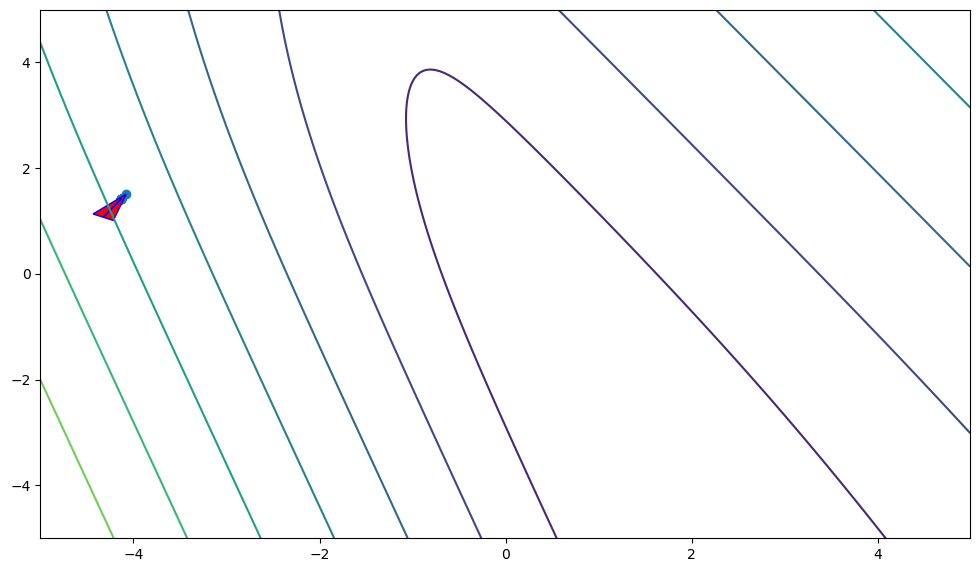

In [408]:
range_y = np.arange(-5, 5, 0.01)
range_x = np.arange(-5, 5, 0.01)
grid_x, grid_y = np.meshgrid(range_x, range_y)

# data_x = np.array([np.ones(len(X)), X])
# print(data_x.shape)

# print(data_y), 

def sigmoid(X, theta):
#     print(beta.shape)
    h = 1.0 / (1 + np.exp(-np.dot(theta, data_x)))
    return h

def loss(theta):
    h = 1.0 / (1 + np.exp(-np.dot(theta, data_x)))
    return -np.sum((np.array(y) * np.log(h) + (1 - np.array(y)) * np.log(1 - h)), axis=-1) / len(y)

grid_z = loss(np.array([grid_x, grid_y]).T)
fig, ax = plt.subplots(figsize=(12, 7), dpi=100)
cs = ax.contour(grid_x, grid_y, grid_z)

theta_0 = []
theta_1 = []


theta_ls.append(np.squeeze(theta.getA()).tolist())
print(theta_ls)
for t in theta_ls: 
#     print(t)
    theta_0.append(t[0])
    theta_1.append(t[1])
#     theta.append([t[0][0], t[1][0]])
    
ax.scatter(theta_0, theta_1)
for i in range(len(theta_0)):
    if i+1 < len(theta_0):
        ax.arrow(theta_0[i], theta_1[i],theta_0[i+1]-theta_0[i],theta_1[i+1]-theta_1[i],length_includes_head = True,head_width = 0.25,head_length = 0.5,fc = 'r',ec = 'b')


From the contour graph, we can see that the netwon metho is closer to the minimizer.